In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing
#Vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.subplots as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly_express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

# <a id="1">1.Data</a>

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# <a id="2">1.1. Data overview</a>

In [3]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())
df.info()

Rows     :  284807
Columns  :  31

Features : 
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing values :   0

Unique values :  
 Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        

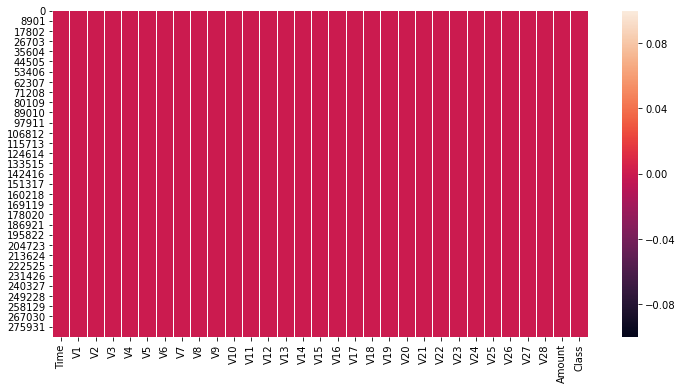

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

# <a id="2"> 2. Exploratory Data Analysis </a>

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df1000=df[["Time","Amount","Class","V1","V10","V20","V28"]][:1000:]

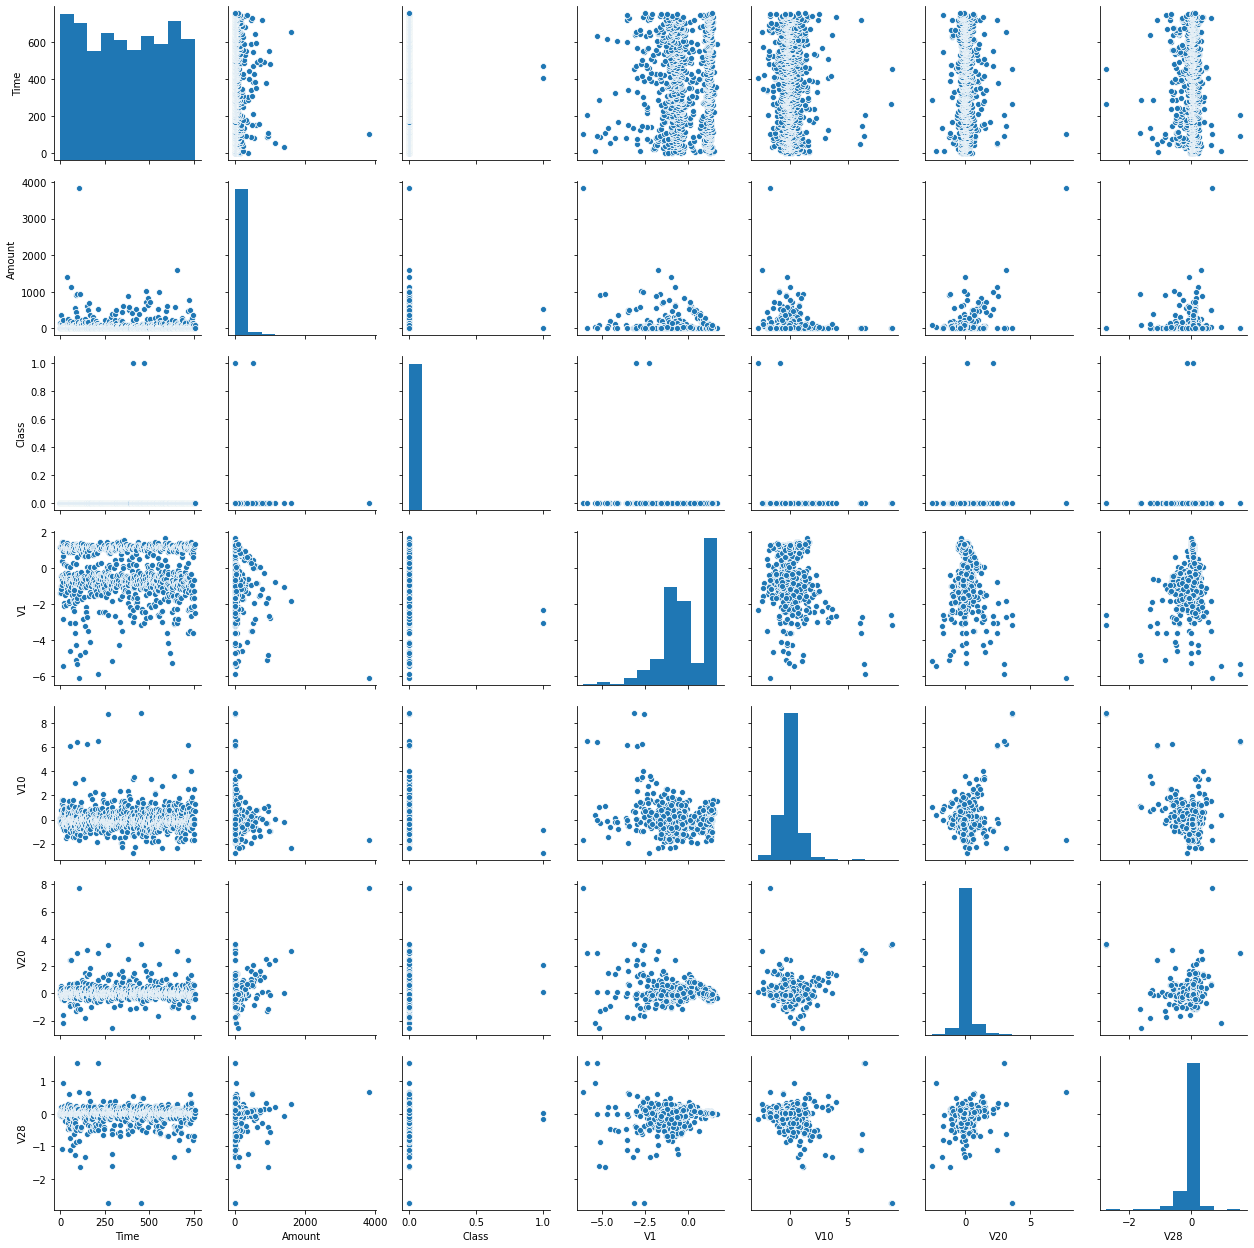

In [7]:
sns.pairplot(df1000)

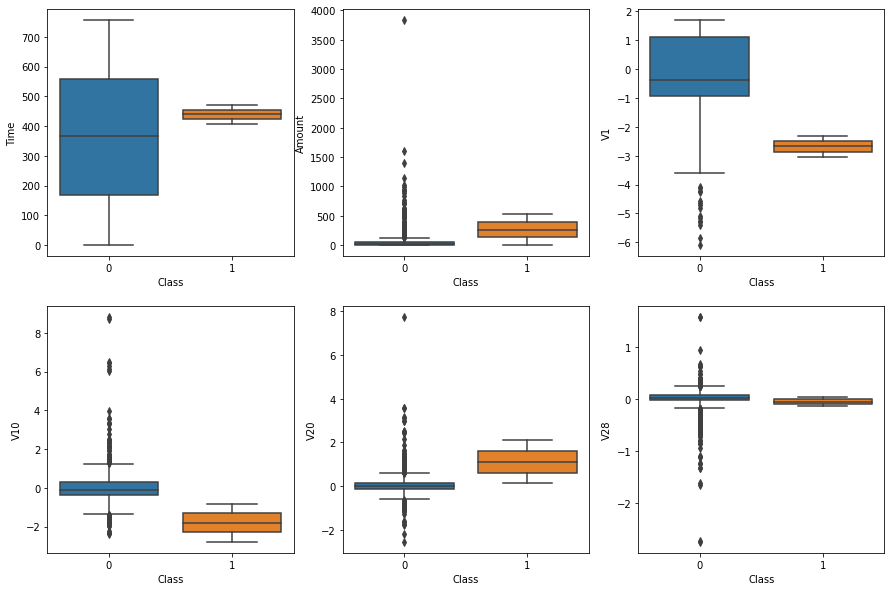

In [8]:
fig, axes = plt.subplots(2, 3,figsize=(15,10))
sns.boxplot(x="Class",y="Time",data=df1000,ax=axes[0][0])
sns.boxplot(x="Class",y="Amount",data=df1000,ax=axes[0][1])
sns.boxplot(x="Class",y="V1",data=df1000,ax=axes[0][2])
sns.boxplot(x="Class",y="V10",data=df1000,ax=axes[1][0])
sns.boxplot(x="Class",y="V20",data=df1000,ax=axes[1][1])
sns.boxplot(x="Class",y="V28",data=df1000,ax=axes[1][2])

In [9]:
df2=df1000[["V1","V10","V20","V28","Class"]]
df2=pd.melt(df2,id_vars="Class",var_name="Features",value_name="value")

(-0.03, 0.05)

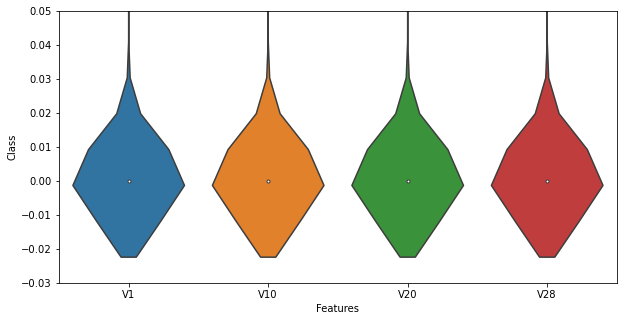

In [10]:
plt.figure(figsize=(10,5))
sns.violinplot(x="Features",y="Class",data=df2)
plt.ylim(-0.03,0.05)

In [11]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 750,
                        width   = 850,
                        margin  = dict(r = 0 ,l = 110,
                                       t = 25,b = 10,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 12)),
                        xaxis   = dict(tickfont = dict(size = 12))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

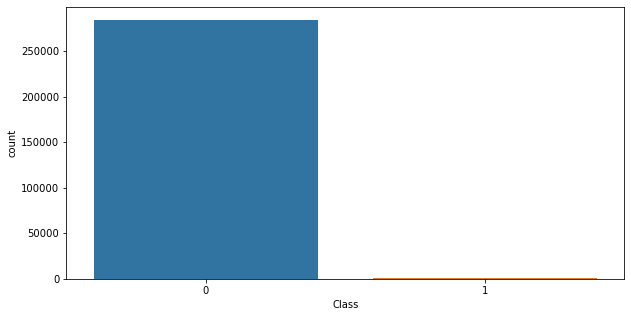

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(df["Class"])

In [13]:
Fraud=df[df['Class']==1]
NoFraud=df[df['Class']==0]
Fraud.shape,NoFraud.shape

((492, 31), (284315, 31))

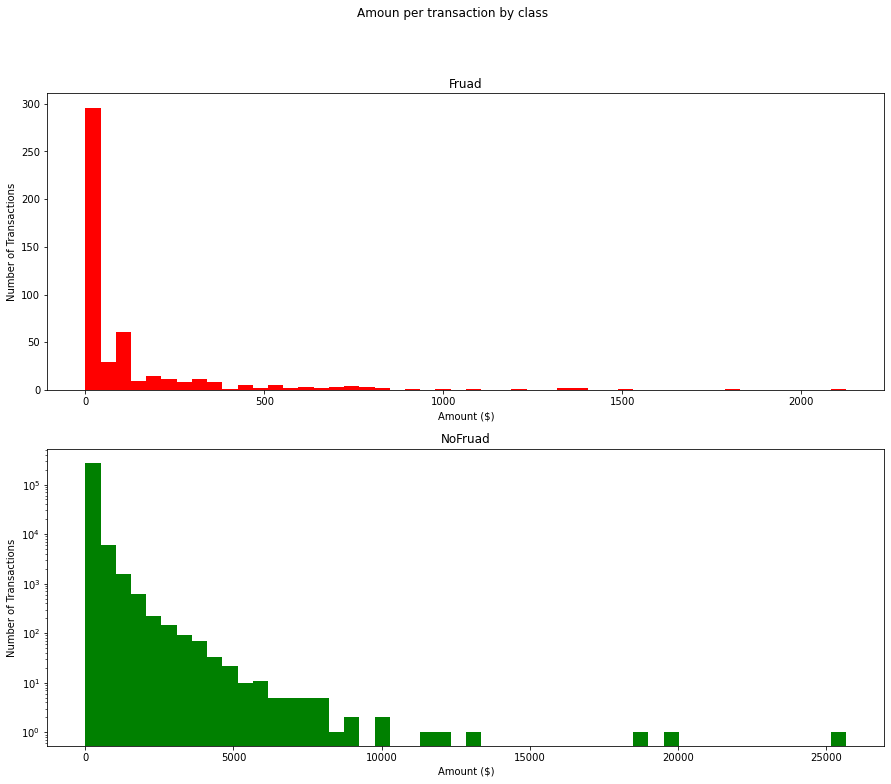

In [14]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,12))
fig.suptitle("Amoun per transaction by class")
ax1.hist(Fraud.Amount,bins=50,color="red")
ax1.set_title("Fruad")
ax1.set_xlabel("Amount ($)")
ax1.set_ylabel("Number of Transactions")
ax2.hist(NoFraud.Amount,color="green",bins=50)
ax2.set_title("NoFruad")
ax2.set_xlabel("Amount ($)")
ax2.set_ylabel("Number of Transactions")
# plt.xlim((0,20000))
plt.yscale("log")


Text(0, 0.5, 'Amount')

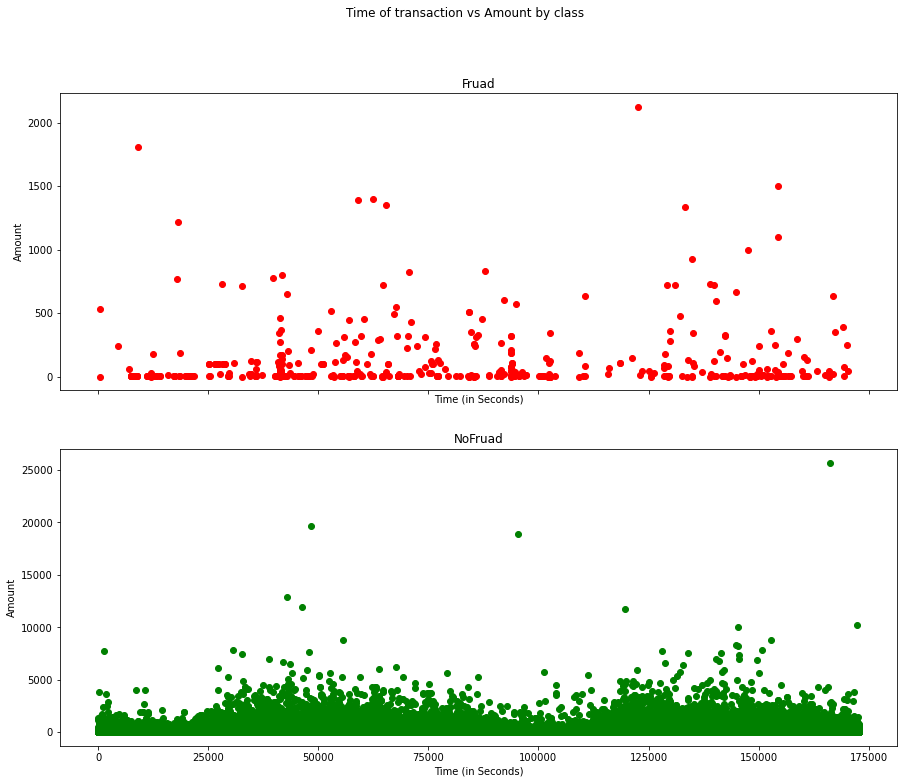

In [15]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(15,12))
fig.suptitle("Time of transaction vs Amount by class")
ax1.scatter(Fraud.Time,Fraud.Amount,color="red")
ax1.set_title("Fruad")
ax1.set_xlabel("Time (in Seconds)")
ax1.set_ylabel("Amount")
ax2.scatter(NoFraud.Time,NoFraud.Amount,color="green")
ax2.set_title("NoFruad")
ax2.set_xlabel("Time (in Seconds)")
ax2.set_ylabel("Amount")
# plt.xlim((0,20000))


# <a id="3"> 3. Data Preprocessing </a>

In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,30:31]

In [4]:
sc = StandardScaler()
X_std =sc.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=42)

# <a id="4"> 4. Model Building </a>

In [13]:
def Fraud(algorithm, X_train, X_test, y_train, y_test,feature_importance):
    algorithm.fit(X_train,y_train)
    training_score = algorithm.score( X_train, y_train)
    pred = algorithm.predict(X_test)
    probablities = algorithm.predict_proba ( X_test )
    print ("Training score: ",training_score)
    print ("Classification report: \n" , classification_report ( y_test, pred) )
    print ("Accuracy Score :", accuracy_score ( y_test, pred ))
    print ('F1_score :', f1_score ( y_test, pred ))
#     plot confusion matrix
    cm = confusion_matrix( y_test, pred )
     #plot roc_auc_score
    model_roc_auc = roc_auc_score( y_test , pred ) 
    print ("Area under curve : ", model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve( y_test, probablities [:,1] )
    
    #     plot confusion matrix
    trace1 = go.Heatmap(z = cm ,
                        x = ["Not Fraud","Fraud"],
                        y = ["Not Fraud","Fraud"],
                        showscale  = False,colorscale = [(0, "red"), (0.001, "black"), (1, "green")],
                        name = "matrix")
    #plot roc_auc_score
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    fig = tls.make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = True,height = 500,width = 1000,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 10))
    fig["layout"]["xaxis2"].update(dict(title = "False positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "True positive rate"))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)

    py.iplot(fig)
#     plot feature importcance
    if feature_importance=="coefficients":
        coefs = algorithm.coef_.ravel()
        coefs1 = pd.DataFrame(coefs).rename(columns={0:"Coef"})
        col = X.columns[algorithm.coef_.argsort().ravel()]
        columns = pd.DataFrame(col).rename(columns={0:"Columns"})
        imp = pd.concat([columns,coefs1],axis=1)
        imp = imp.sort_values(by=["Coef"],ascending=False)
        fig = px.bar(imp, x='Columns', y='Coef',color="Coef",animation_group="Coef")
        fig.show()
#     elif feature_importance=="features" :
#         coefs = algorithm.feature_importances_.reshape(30,1)
#         col_sorted_by_importance=forest.feature_importances_.argsort()[::-1]
#         feat_imp=pd.DataFrame({
#             'cols':X_train.columns[col_sorted_by_importance],
#             'imps':forest.feature_importances_[col_sorted_by_importance]})
#         px.bar(feat_imp, x='cols', y='imps')
        
    
    
    
logit=LogisticRegression(max_iter= 100, solver= 'lbfgs')

Fraud(logit,X_train,X_test,y_train.values.ravel(),y_test,"coefficients")

Training score:  0.9991824000321021
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score : 0.9992743700478681
F1_score : 0.7350427350427351
Area under curve :  0.8161061363835393 



# <a id="5"> 5. GridSearchCv </a>

In [7]:
def GridSearch(algorithm,grid,X_train,y_train,cv):
    grid_search=GridSearchCV(algorithm,grid,cv=cv)
    grid_search.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
    print("accuracy :",grid_search.best_score_)
    
algorithm=LogisticRegression()
grid={"solver":["lbfgs"],"max_iter":[100]}
GridSearch(algorithm,grid,X_train,y_train.values.ravel(),2)

tuned hpyerparameters :(best parameters)  {'max_iter': 100, 'solver': 'lbfgs'}
accuracy : 0.9991372564755924


# <a id="6"> 6. Cross Validation </a>

In [21]:
def cross_val(algorithm,X_train,y_train,cv):
#     score=cross_val_score(algorithm, X_train, y_train,cv=cv)
#     print(score)
# #     The mean score and the 95% confidence interval of the score estimate are hence given by:
#     print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    scores = cross_val_score(algorithm, X_train, y_train, cv=cv, scoring='f1_macro')
    print("f1-macro-score:",scores)
    print("f1-macro-score-mean:",scores.mean())
algorithm=LogisticRegression(max_iter= 1000, solver= 'lbfgs')
cross_val(algorithm,X_train,y_train.values.ravel(),5)

f1-macro-score: [0.85323479 0.86113732 0.8527214  0.84760632 0.89534653]
f1-macro-score-mean: 0.8620092731635968


# <a id="7"> 7.Undersampling  </a>

In [8]:
nm=NearMiss(random_state=42)
X_under,y_under=nm.fit_sample(X,y.values.ravel())

In [9]:
y_un=pd.DataFrame(y_under).rename(columns={0:"Class"})

In [10]:
Fraud = y_un[y_un['Class']==1]

Valid = y_un[y_un['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("NoFraud Cases : {}".format(len(Valid)))

1.0
Fraud Cases : 492
NoFraud Cases : 492


In [11]:
## StandardScale
sc = StandardScaler()
X_std = sc.fit_transform(X_under)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_std, y_un, test_size=0.30, random_state=42)
X_train_under=pd.DataFrame(X_train_under).rename(columns={0:"Time",1:"V1",2:"V2",3:"V3",4:"V4",5:"V5",6:"V6",7:"V7",8:"V8",9:"V9",10:"V10",
                                          11:"V11",12:"V12",13:"V13",14:"V14",15:"V15",16:"V16",17:"V17",18:"V18",19:"V19",
                                           20:"V20",21:"V21",22:"V22",23:"V23",24:"V24",25:"V25",26:"V26",27:"V27",28:"V28",
                                           29:"Amount"
                                          })
X_test_under=pd.DataFrame(X_test_under).rename(columns={0:"Time",1:"V1",2:"V2",3:"V3",4:"V4",5:"V5",6:"V6",7:"V7",8:"V8",9:"V9",10:"V10",
                                          11:"V11",12:"V12",13:"V13",14:"V14",15:"V15",16:"V16",17:"V17",18:"V18",19:"V19",
                                           20:"V20",21:"V21",22:"V22",23:"V23",24:"V24",25:"V25",26:"V26",27:"V27",28:"V28",
                                           29:"Amount"
                                          })

# <a id="8"> 8.Undersampling apply Logistic Regression </a>


In [14]:
logit=LogisticRegression(max_iter= 100, solver= 'lbfgs',random_state=101)

Fraud(logit,X_train_under,X_test_under,y_train_under,y_test_under,"coefficients")

C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training score:  0.9593023255813954
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       150
           1       0.97      0.93      0.95       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

Accuracy Score : 0.9527027027027027
F1_score : 0.9510489510489512
Area under curve :  0.952420091324201 



# <a id="9"> 9.Undersampling apply GridSearchCV  </a>

In [15]:
algorithm=LogisticRegression()
grid={"penalty":["l1","l2"],"tol":[0.0001,0.001],"C":[0.1,1,10],
      "class_weight":["balanced",None],"solver":["liblinear"],"max_iter":[10000,1000]}
GridSearch(algorithm,grid,X_train_under,y_train_under.values.ravel(),5)

tuned hpyerparameters :(best parameters)  {'C': 1, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
accuracy : 0.9520348837209303


In [32]:
logit=LogisticRegression(penalty="l1",C=1, class_weight="balanced",max_iter= 1000, solver= 'liblinear',tol=0.0001)
Fraud(logit,X_train_under,X_test_under,y_train_under.values.ravel(),y_test_under,"coefficients")

Training score:  0.9593023255813954
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       150
           1       0.98      0.94      0.96       146

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

Accuracy Score : 0.9594594594594594
F1_score : 0.9580419580419579
Area under curve :  0.9591780821917808 



# <a id="10"> 10.Recursive Feature Elimination  </a>

In [24]:
logit = LogisticRegression(max_iter= 1000, solver= 'lbfgs')
rfe=RFE(logit,5)
rfe=rfe.fit(X_train_under,y_train_under.values.ravel())
rfe.support_
rfe.ranking_
idc_rfe=pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X.columns],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

train_rf_X = X_train_under[cols]
train_rf_Y = y_train_under
test_rf_X  = X_test_under[cols]
test_rf_Y  = y_test_under
logit_rfe=LogisticRegression(max_iter= 1000, solver= 'lbfgs')
Fraud(logit_rfe,train_rf_X,test_rf_X,train_rf_Y.values.ravel(),test_rf_Y,"coefficients")

Training score:  0.9520348837209303
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       150
           1       0.99      0.94      0.96       146

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296

Accuracy Score : 0.9662162162162162
F1_score : 0.9647887323943661
Area under curve :  0.9658447488584475 



# <a id="11"> 11.Principal Components Analysis  </a>

In [46]:
sc = StandardScaler()
X_std =sc.fit_transform(X)

In [47]:
pca = PCA (n_components=2)
prc_comp=pca.fit_transform(X_std)
prc_X=pd.DataFrame(prc_comp,columns=["Pc1","Pc2"])

In [54]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(prc_X, y, test_size=0.30, random_state=42)

In [55]:
logit_pca=LogisticRegression(max_iter= 1000, solver= 'lbfgs')
Fraud(logit_pca, X_train_pca, X_test_pca, y_train_pca.values.ravel(), y_test_pca, "coefficients")

Training score:  0.9982143215425051
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score : 0.9984082955888721


C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



F1_score : 0.0
Area under curve :  0.5 



## Pca on undersampling

In [68]:
"X_under,y_under"
sc = StandardScaler()
X_std =sc.fit_transform(X_under)

In [69]:
pca = PCA (n_components=2)
prc_comp=pca.fit_transform(X_std)
prc_X=pd.DataFrame(prc_comp,columns=["Pc1","Pc2"])

In [70]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(prc_X, y_under, test_size=0.30, random_state=42)

In [71]:
logit_pca=LogisticRegression(max_iter= 1000, solver= 'lbfgs')
Fraud(logit_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca, "coefficients")

Training score:  0.8997093023255814
Classification report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       150
           1       1.00      0.81      0.89       146

    accuracy                           0.91       296
   macro avg       0.92      0.90      0.90       296
weighted avg       0.92      0.91      0.90       296

Accuracy Score : 0.9054054054054054
F1_score : 0.8939393939393939
Area under curve :  0.904109589041096 

